<a href="https://colab.research.google.com/github/parkmicheal1114/study/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%ED%9A%8C%EA%B7%80%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 변수 설명
 1. CRIM : 지역별 범죄 발생률
 2. ZN : 25,000 평방 피트를 초과하는 거주 지역의 비율
 3. INDUS : 비상업 지역 넓이 비율
 4. CHAS : 찰스강에 대한 더비 변수( 강의 경계에 위치한 경우는 1, 아니면 0 )
 5. NOX : 일산화질소 농도
 6. RM : 거주할 수 있는 방 개수
 7. AGE : 1940년 이전에 건축된 소유 주택의 비율
 8. DIS : 5개 주요 고용센터 까지의 가중 거리
 9. RAD : 고속도로 접근 용이도
 10. TAX : 10,000 달러당 재산세율
 11. PTRATIO : 지역의 교사와 학생수 비율
 12. B : 지역의 흑인 거주 비율
 13. LSTAT : 하위 계층의 비율
 14. MEDV : 본인 소유의 주택 가격 (중앙값)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
# sklearn 에서는 해당 데이터셋이 삭제 되어 있음
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# 데이터 프레임 으로 변환 
df_boston = pd.DataFrame(data,columns=['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRAIO','B','LSTA'])
df_boston['PRICE']=target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTA,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 데이터 확인 ( 변수 확인 및 기초 통계 )

In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    float64
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    float64
 9   TAX     506 non-null    float64
 10  PTRAIO  506 non-null    float64
 11  B       506 non-null    float64
 12  LSTA    506 non-null    float64
 13  PRICE   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTA,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


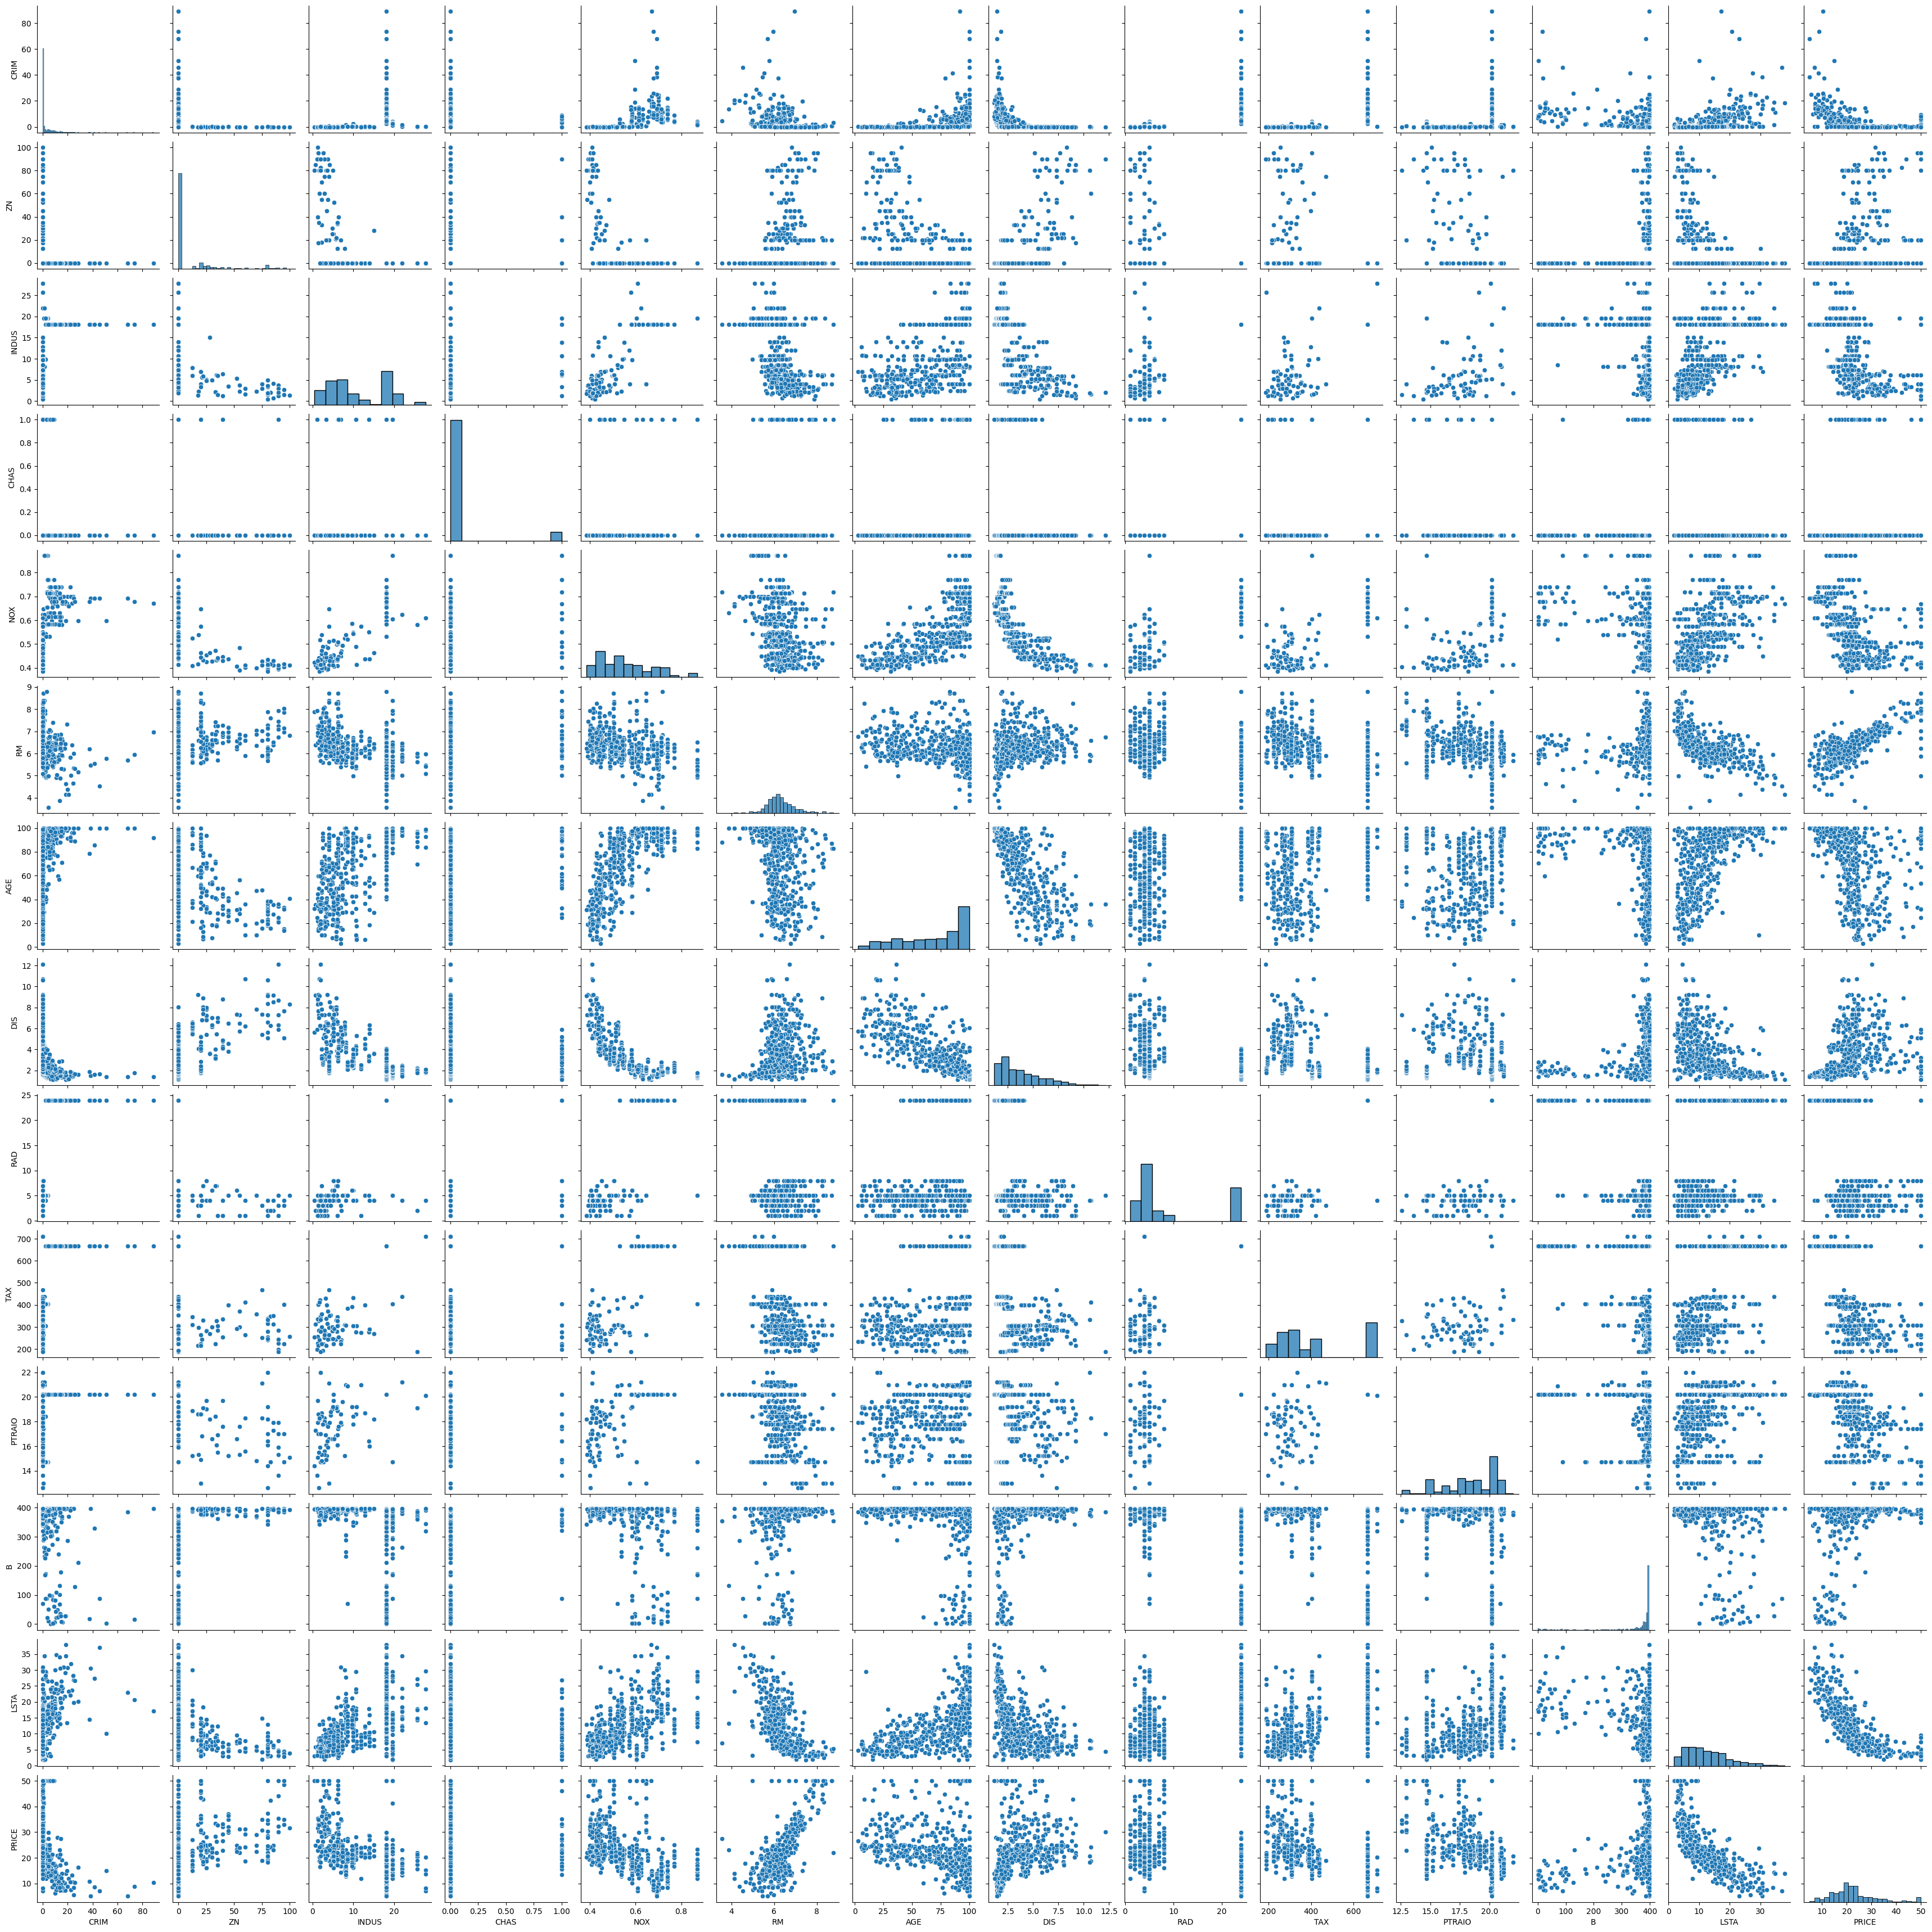

In [ ]:
plt.rcParams['figure.dpi']=100

sns.pairplot(df_boston )

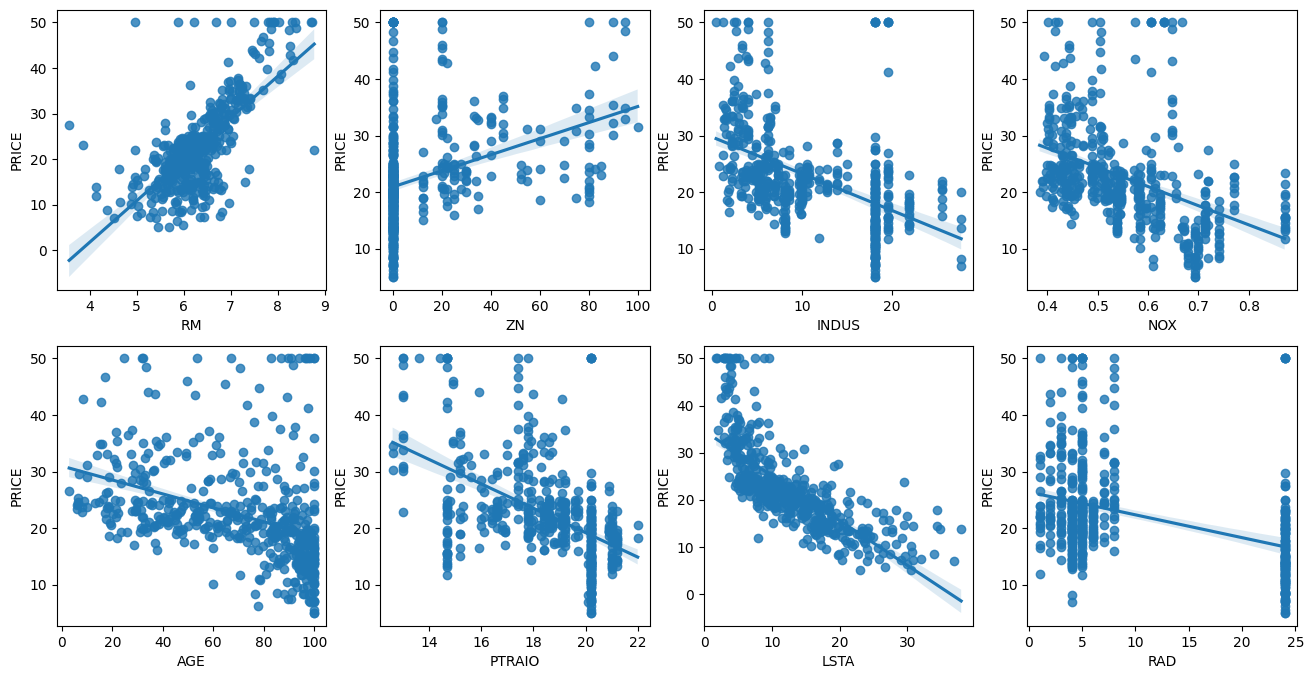

In [ ]:
fig , axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows = 2)
lm_feature = ['RM','ZN','INDUS', 'NOX' ,'AGE' ,'PTRAIO' ,'LSTA' , 'RAD']

for i , feature in enumerate(lm_feature):
  row = int(i/4)
  col = i%4
  sns.regplot(x=feature , y='PRICE' , data = df_boston , ax = axs[row][col])



# 선형 회귀 ( 스케일 하지 않음 )

In [ ]:
# 스케일링 하지 않았음.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

target = df_boston['PRICE']
data  = df_boston.drop(['PRICE'],axis=1)

# 데이터셋 분리 
X_train , X_test , y_train , y_test = train_test_split(data, target , test_size = 0.3 , random_state = 1114)

# 모델 적용 (lr)
model_lr = LinearRegression()
model_lr.fit(X_train , y_train)

# 예측
pred_lr = model_lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_lr)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 23.928942452818024 , RMSE : 4.891721829051405
R2 Score : 0.729831409445924


In [ ]:
# Intercept ,coef
print(f'절편 : {model_lr.intercept_}')
print(f'회귀계수 : {np.round(model_lr.coef_ , 2)}')

절편 : 36.86128621196936
회귀계수 : [-8.000e-02  4.000e-02  3.000e-02  2.690e+00 -1.798e+01  3.840e+00
 -1.000e-02 -1.350e+00  3.000e-01 -1.000e-02 -1.050e+00  1.000e-02
 -4.600e-01]


In [ ]:
# 교차 검증 
## cross_val_score
from sklearn.model_selection import cross_val_score
mse_score = cross_val_score(model_lr , data , target , scoring='neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt( -1 * mse_score )
avg_rmse = np.mean(rmse_score)

print(f"KFold 개별 Negative MSE : {mse_score}")
print(f"KFold 개별 RMSE : {rmse_score}")
print(f"KFold 평규 RMSE : {avg_rmse}")

KFold 개별 Negative MSE : [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
KFold 개별 RMSE : [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
KFold 평규 RMSE : 5.828658946215802


# 선형 회귀 

## Standard

In [ ]:
# 표준화 및학습셋 분리 
df_boston_reg = df_boston.copy()

# 표준화 적용
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaled_data = scaler_std.fit_transform(df_boston_reg)

# Scale된 데이터는 array 형태 라서 보기 쉽게 df 로 변환
df_scaled_data = pd.DataFrame(scaled_data , columns=df_boston_reg.columns)

# 데이터셋 분리
target = df_scaled_data['PRICE']
data  = df_scaled_data.drop(['PRICE'],axis=1)

X_train , X_test , y_train , y_test = train_test_split(data, target , test_size = 0.3 , random_state = 1114)
len(X_train), len(X_test)

(354, 152)

In [ ]:
# 모델 적용 (lr)
model_lr = LinearRegression()
model_lr.fit(X_train , y_train)

# 예측
pred_lr = model_lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_lr)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 0.2834525972696715 , RMSE : 0.5324026645967049
R2 Score : 0.7298314094459242


## MinMax 

In [ ]:
# 정규화 적용
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_data = scaler_minmax.fit_transform(df_boston_reg)

# Scale된 데이터는 array 형태 라서 보기 쉽게 df 로 변환
df_scaled_data = pd.DataFrame(scaled_data , columns=df_boston_reg.columns)

# 데이터셋 분리
target = df_scaled_data['PRICE']
data  = df_scaled_data.drop(['PRICE'],axis=1)

X_train , X_test , y_train , y_test = train_test_split(data, target , test_size = 0.3 , random_state = 1114)
len(X_train), len(X_test)

(354, 152)

In [ ]:
# 모델 적용 (lr)
model_lr = LinearRegression()
model_lr.fit(X_train , y_train)

# 예측
pred_lr = model_lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_lr)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 0.011816761705095314 , RMSE : 0.10870492953447564
R2 Score : 0.7298314094459241


>  MSE 값이 STD 에 비해서 MinMax 에서 더 극적으로 변화 했음.
>  데이터 자체에 분산이 큰 데이터 들은 STD 보다는 MinMax 에서 더 좋은 성능이 나오는 것 같음.

In [ ]:
# 교차 검증 
## MinMAxScaler 전처리 후 선형 회귀 적용.
from sklearn.model_selection import cross_val_score
mse_score = cross_val_score(model_lr , data , target , scoring='neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt( -1 * mse_score )
avg_rmse = np.mean(rmse_score)

print(f"KFold 개별 Negative MSE : {mse_score}")
print(f"KFold 개별 RMSE : {rmse_score}")
print(f"KFold 평규 RMSE : {avg_rmse}")

KFold 개별 Negative MSE : [-0.00615323 -0.01286352 -0.01633291 -0.03988265 -0.01645116]
KFold 개별 RMSE : [0.07844256 0.11341744 0.12780026 0.19970642 0.12826209]
KFold 평규 RMSE : 0.12952575436035113


># Elastic NET

In [77]:
from sklearn.linear_model import ElasticNet

# 데이터는 Minmax scaler
# 모델 적용 (Elastic)
model_en = ElasticNet(alpha = 0.5 , l1_ratio = 0.05)
model_en.fit(X_train , y_train)

# 예측
pred_en = model_en.predict(X_test)

# 평가
mse = mean_squared_error(y_test,pred_en)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_en)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 0.04246745177990512 , RMSE : 0.2060763251319887
R2 Score : 0.02905957840777107


In [87]:
# GridSeach 로 하이퍼 파라미터 찾기
model_en = ElasticNet()
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001 , 0.05 , 0.5 , 1 , 3] , 'l1_ratio':[0.001,0.01,0.1,0.5,0.9]}

grid = GridSearchCV(model_en , param_grid = param , cv = 3 , refit=True)
grid.fit(X_train , y_train) # MinMax 스케일.

# DataFrame 으로 변환
score_df  = pd.DataFrame(grid.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010489,0.004386,0.005569,0.003820,0.001,0.001,"{'alpha': 0.001, 'l1_ratio': 0.001}",0.763890,0.662025,0.725232,0.717049,0.041987,3
1,0.006695,0.003411,0.009045,0.001261,0.001,0.01,"{'alpha': 0.001, 'l1_ratio': 0.01}",0.763859,0.661775,0.725627,0.717087,0.042111,2
2,0.008349,0.003287,0.005572,0.004033,0.001,0.1,"{'alpha': 0.001, 'l1_ratio': 0.1}",0.763380,0.659140,0.729371,0.717297,0.043403,1
3,0.008857,0.003361,0.005147,0.003223,0.001,0.5,"{'alpha': 0.001, 'l1_ratio': 0.5}",0.761196,0.644119,0.739408,0.714908,0.050839,4
4,0.014540,0.009494,0.007477,0.003403,0.001,0.9,"{'alpha': 0.001, 'l1_ratio': 0.9}",0.759160,0.629222,0.736492,0.708291,0.056671,5
5,0.010142,0.004652,0.010276,0.001847,0.05,0.001,"{'alpha': 0.05, 'l1_ratio': 0.001}",0.640483,0.488278,0.632227,0.586996,0.069885,6
6,0.012369,0.001975,0.002722,0.000114,0.05,0.01,"{'alpha': 0.05, 'l1_ratio': 0.01}",0.632683,0.481081,0.624711,0.579492,0.069663,7
7,0.003535,0.000140,0.010313,0.000812,0.05,0.1,"{'alpha': 0.05, 'l1_ratio': 0.1}",0.565188,0.419201,0.554539,0.512976,0.066451,8
8,0.008876,0.003892,0.015070,0.009513,0.05,0.5,"{'alpha': 0.05, 'l1_ratio': 0.5}",0.131889,0.102971,0.147301,0.127387,0.018376,12
9,0.012047,0.007334,0.004941,0.003375,0.05,0.9,"{'alpha': 0.05, 'l1_ratio': 0.9}",-0.000622,-0.002708,-0.001050,-0.001460,0.000900,16


In [88]:
print(f'GridSearchCV 최고 정확도 : {grid.best_score_}')
print(f'GridSearchCV 최적 파라미터 : {grid.best_params_}')
grid.best_estimator_

GridSearchCV 최고 정확도 : 0.7172970591644985
GridSearchCV 최적 파라미터 : {'alpha': 0.001, 'l1_ratio': 0.1}


ElasticNet(alpha=0.001, l1_ratio=0.1)

In [89]:
# GridSearch 의 refit으로 이미 학습된 estimator를 반환
model_opt = grid.best_estimator_

# 예측
pred_en = model_opt.predict(X_test)

# 평가
mse = mean_squared_error(y_test,pred_en)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_en)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 0.012119718410088689 , RMSE : 0.11008959265111616
R2 Score : 0.7229048598522503


In [90]:
# 교차 검증 
mse_score = cross_val_score(model_opt , data , target , scoring='neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt( -1 * mse_score )
avg_rmse = np.mean(rmse_score)

print(f"KFold 개별 Negative MSE : {mse_score}")
print(f"KFold 개별 RMSE : {rmse_score}")
print(f"KFold 평규 RMSE : {avg_rmse}")

KFold 개별 Negative MSE : [-0.00561044 -0.01210367 -0.01653433 -0.03707544 -0.01332384]
KFold 개별 RMSE : [0.07490285 0.11001669 0.12858587 0.19254984 0.11542895]
KFold 평규 RMSE : 0.12429684142055555


In [91]:
# r2 score
from sklearn.metrics import r2_score
print(f'r2 스코어 : {r2_score(y_test , pred_en)}')

r2 스코어 : 0.7229048598522503


# 랜덤포레스트 회귀 

In [92]:
from sklearn.ensemble import RandomForestRegressor
# 모델 적용
model_rfr = RandomForestRegressor(n_estimators = 500 , max_depth = 4)
model_rfr.fit(X_train , y_train)
# 예측 적용
pred_rfr = model_rfr.predict(X_test) 

# 평가
mse = mean_squared_error(y_test,pred_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_rfr)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 0.0059200086188809925 , RMSE : 0.07694159225595083
R2 Score : 0.8646498571650634


In [93]:
# 교차 검증 
mse_score = cross_val_score(model_rfr , data , target , scoring='neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt( -1 * mse_score )
avg_rmse = np.mean(rmse_score)

print(f"KFold 개별 Negative MSE : {mse_score}")
print(f"KFold 개별 RMSE : {rmse_score}")
print(f"KFold 평규 RMSE : {avg_rmse}")

KFold 개별 Negative MSE : [-0.00431952 -0.00663622 -0.0132901  -0.0239043  -0.00994481]
KFold 개별 RMSE : [0.06572305 0.08146302 0.11528271 0.15461016 0.09972365]
KFold 평규 RMSE : 0.10336051674821249


# xgBoost회귀

In [94]:
from xgboost import XGBRegressor
# 모델 적용
model_xgb = XGBRegressor(n_estimators = 500 , max_depth = 4)
model_xgb.fit(X_train , y_train)
# 예측 적용
pred_xgb = model_xgb.predict(X_test) 

# 평가
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_xgb)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 0.004357589679558275 , RMSE : 0.06601204192841087
R2 Score : 0.900371701543951


In [95]:
# 교차 검증 
mse_score = cross_val_score(model_xgb , data , target , scoring='neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt( -1 * mse_score )
avg_rmse = np.mean(rmse_score)

print(f"KFold 개별 Negative MSE : {mse_score}")
print(f"KFold 개별 RMSE : {rmse_score}")
print(f"KFold 평규 RMSE : {avg_rmse}")

KFold 개별 Negative MSE : [-0.0038814  -0.0092826  -0.01128061 -0.02037136 -0.00955951]
KFold 개별 RMSE : [0.06230089 0.09634626 0.1062102  0.14272828 0.09777273]
KFold 평규 RMSE : 0.10107167054410056


# LGBM 회귀

In [97]:
from lightgbm import LGBMRegressor
# 모델 적용
model_lgbm = LGBMRegressor(n_estimators = 500 , max_depth = 4)
model_lgbm.fit(X_train , y_train)
# 예측 적용
pred_lgbm = model_lgbm.predict(X_test) 

# 평가
mse = mean_squared_error(y_test,pred_lgbm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_lgbm)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 0.004620578969746005 , RMSE : 0.06797484071144268
R2 Score : 0.8943589336102286


In [98]:
# 교차 검증 
mse_score = cross_val_score(model_lgbm , data , target , scoring='neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt( -1 * mse_score )
avg_rmse = np.mean(rmse_score)

print(f"KFold 개별 Negative MSE : {mse_score}")
print(f"KFold 개별 RMSE : {rmse_score}")
print(f"KFold 평규 RMSE : {avg_rmse}")

KFold 개별 Negative MSE : [-0.00448587 -0.00882038 -0.00777233 -0.02265202 -0.01395996]
KFold 개별 RMSE : [0.0669766  0.09391689 0.08816083 0.15050589 0.11815228]
KFold 평규 RMSE : 0.1035424990796843


<Axes: >

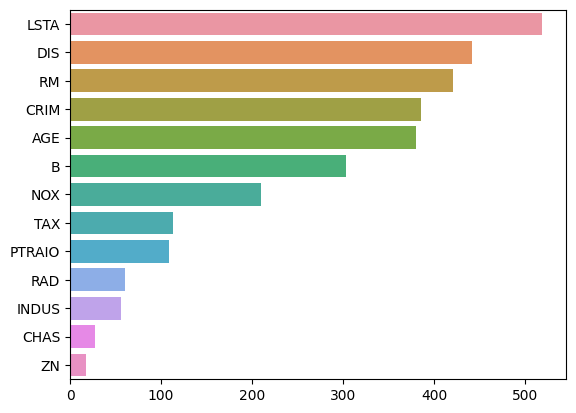

In [102]:
series = pd.Series(data= model_lgbm.feature_importances_ , index = X_train.columns)
series = series.sort_values(ascending = False)
sns.barplot(x=series , y=series.index)

# 변수 설명
 1. CRIM : 지역별 범죄 발생률
 2. ZN : 25,000 평방 피트를 초과하는 거주 지역의 비율
 3. INDUS : 비상업 지역 넓이 비율
 4. CHAS : 찰스강에 대한 더비 변수( 강의 경계에 위치한 경우는 1, 아니면 0 )
 5. NOX : 일산화질소 농도
 6. RM : 거주할 수 있는 방 개수
 7. AGE : 1940년 이전에 건축된 소유 주택의 비율
 8. DIS : 5개 주요 고용센터 까지의 가중 거리
 9. RAD : 고속도로 접근 용이도
 10. TAX : 10,000 달러당 재산세율
 11. PTRATIO : 지역의 교사와 학생수 비율
 12. B : 지역의 흑인 거주 비율
 13. LSTAT : 하위 계층의 비율
 14. MEDV : 본인 소유의 주택 가격 (중앙값)